# Data Analytics III


#### 1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.

#### 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

## 1. Importing all the required Python Libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading the Dataset into pandas’ data frame.

In [2]:
df=pd.read_csv('Iris.csv')

#### 2.1 Dimesnions of Dataset

In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Statistical Summary

In [5]:
df.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


Findings :

3 unique species: (Iris-setosa, Iris-versicolor, Iris-virginica)

Iris-setosa appears most frequently: 50 out of 150 observations

Petal lengths range widely from 1.0 cm to 6.9 cm, likely reflecting differences across species.

Sepal widths are fairly consistent, ranging from 2.0 cm to 4.4 cm, with most between 2.8 cm and 3.3 cm.

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# TARGET VARIABLE :specie 

In [8]:
# df["Species"] = df["Species"].astype(str)

## 3.Visualization to understand Feature Distribution

#### When it comes to Petal Length and Petal Width Iris-setosa 
#### is easily distinguishable from Vriginica and versicolor 

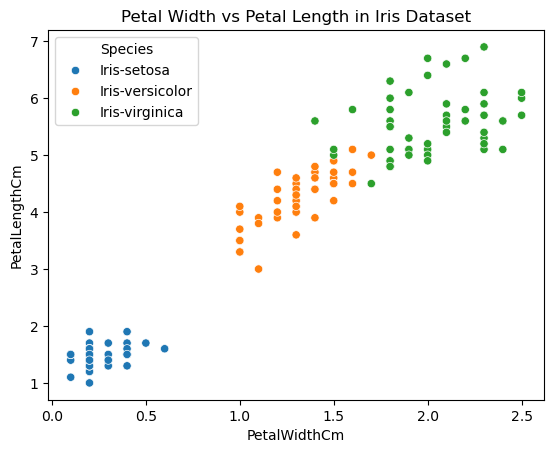

In [9]:
sns.scatterplot(data=df, x='PetalWidthCm', y='PetalLengthCm', hue='Species')
plt.title("Petal Width vs Petal Length in Iris Dataset")
plt.show()


The Petal Length and Petal Width are the most powerful distinguishing features for Setosa.

Setosa has significantly smaller petal length and width than the other two species.

There is a clear gap in Petal Length and Petal Width between Setosa and the others.

Setosa forms a distinct cluster when plotting these features.

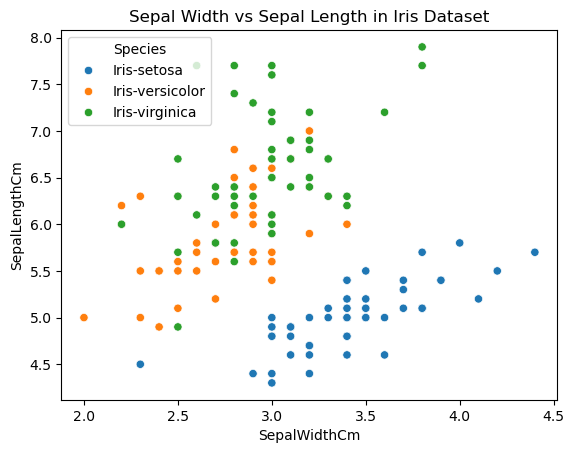

In [10]:
sns.scatterplot(data=df, x='SepalWidthCm', y='SepalLengthCm', hue='Species')
plt.title("Sepal Width vs Sepal Length in Iris Dataset")
plt.show()

Observation :

Sepal Width is a useful distinguishing feature for Setosa but less so for Versicolor and Virginica due to their significant overlap.
    
There is more variation in Versicolor and Virginica, making it harder to separate them based on Sepal Width alone.

#### It becomes difficult to classify versicolor and virginica on sepal length and Sepal Width
#### Setosa is clustered separately while Versicolor and Virginica overlap

### Encoding Categorical feature Species using LabelEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Species']=le.fit_transform(df['Species'])

In [12]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


## 4.Making Predictions 

### 4.1 Dropping Column to Predict and Normalizing using MinMax Scaler

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df.drop(columns=['Id','Species'])
y=df['Species']

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

### 4.2 Splitting Data for Training & Testing

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.44,random_state=47)

In [18]:
# model=GaussianNB(var_smoothing=1e-9)
model=GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [19]:
y_pred=model.predict(X_test)

## Metrics

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
from sklearn.metrics import classification_report, precision_score, recall_score

In [22]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.9848484848484849

In [23]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[28,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 23]], dtype=int64)

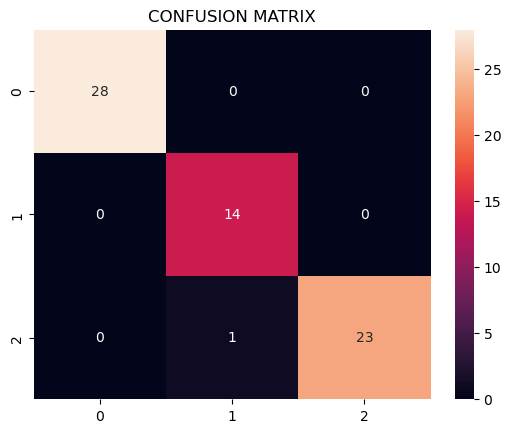

In [24]:
sns.heatmap(cm,annot=True)
plt.title('CONFUSION MATRIX')
plt.show()

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

X-axis (Columns) : Predicted Labels (What the model predicted)

Y-axis (Rows) : Actual Labels (What the actual class was)

OBSERVATION :

row 2, column 1 : 1 Virginica was misclassified as Versicolor

In [25]:
import numpy as np

classes = np.unique(y_test)  
d1 = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
d1_reverse = {v: k for k, v in d1.items()}  

for c in classes:
    class_name = d1_reverse[c]  

    TP = np.sum((y_test == c) & (y_pred == c))
    FP = np.sum((y_test != c) & (y_pred == c))
    FN = np.sum((y_test == c) & (y_pred != c))
    TN = np.sum((y_test != c) & (y_pred != c))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0  
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0  
    error_rate = 1 - accuracy  

    print(f"Class: {class_name}")
    print(f"   TP={TP}, FP={FP}, FN={FN}, TN={TN}")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall: {recall:.4f}")
    print(f"   Error Rate: {error_rate:.4f}\n")


Class: Iris-setosa
   TP=28, FP=0, FN=0, TN=38
   Accuracy: 1.0000
   Precision: 1.0000
   Recall: 1.0000
   Error Rate: 0.0000

Class: Iris-versicolor
   TP=14, FP=1, FN=0, TN=51
   Accuracy: 0.9848
   Precision: 0.9333
   Recall: 1.0000
   Error Rate: 0.0152

Class: Iris-virginica
   TP=23, FP=0, FN=1, TN=42
   Accuracy: 0.9848
   Precision: 1.0000
   Recall: 0.9583
   Error Rate: 0.0152



In [26]:
print(classification_report(y_test, y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        28
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.96      0.98        24

       accuracy                           0.98        66
      macro avg       0.98      0.99      0.98        66
   weighted avg       0.99      0.98      0.98        66



Recall did we catch all correct values 

did we correctly predicted for all true values (correct classification of actual posiitves)

TP / (TP + FN)

Precision :  how many of the classified values were actually correct 

 how many positively classified values were actually correct

TP / (TP + FP)